<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 31/03/2022
- Convocatoria 2 - 07/04/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que subir el notebook al repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

#### - Descargar y guardar los dataset de Kaggle

In [2]:
#Instalar paquete de API de Kaggle

In [3]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Importar paquetes para usar en la actividad
import numpy as np
import pandas as pd
import zipfile as zp
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Autenticacion con Kaggle API
os.environ['KAGGLE_USERNAME'] = "jmejiasb"
os.environ['KAGGLE_KEY'] = "782634d4517fd0263297f09bf847ecad"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [6]:
#Descargar zip de archivos con API de Kaggle
#Para descargar usando el Kaggle API se debe usar el link del dataset (la url de kaggle despues de "www.kaggle.com/") y la ruta donde guardar el archivo zip
route = os.path.join("res")
api.dataset_download_files("heesoo37/120-years-of-olympic-history-athletes-and-results", path = route)
api.dataset_download_files("jayrav13/olympic-track-field-results", path = route)

In [7]:
#Extraer archivos zip de los dataset en su respectiva carpeta

#120 years of olympic history: athletes and results
with zp.ZipFile("res/120-years-of-olympic-history-athletes-and-results.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res","120_years_olympic_history")) 
    print('Done!')
    
#Olympic track field results
with zp.ZipFile("res/olympic-track-field-results.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res","olympic-track-field-results")) 
    print('Done!')

Extracting all files...
Done!
Extracting all files...
Done!


In [8]:
#Guardar csv en su respectivo DataFrame

#120 years of olympic history: athletes and result
olympic_history_route = os.path.join("res","120_years_olympic_history","athlete_events.csv")


olympic_history = pd.read_csv(olympic_history_route, engine="python", header=0)

olympic_history.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
144594,72573,Urszula Wanda ukomska (-Olejniczak),F,25.0,NaN,NaN,Poland,POL,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Women's Individual All-Around,NaN
20735,10942,Tams Berzicza,M,25.0,176.0,82.0,Hungary,HUN,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",NaN
86013,43616,Andr Onsime Gaston Guerrier,M,49.0,NaN,NaN,Namoussa,FRA,1924 Summer,1924,Summer,Paris,Sailing,Sailing Mixed 8 metres,Bronze
59564,30509,Julia Dujmovits,F,26.0,168.0,60.0,Austria,AUT,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Women's Parallel Giant Slalom,NaN
76335,38735,Edward Gardre,M,27.0,NaN,NaN,France,FRA,1936 Summer,1936,Summer,Berlin,Fencing,"Fencing Men's Sabre, Individual",NaN


In [9]:
#Track field results
olympic_track_field_route = os.path.join("res","olympic-track-field-results","results.csv")

#Al intentar leer el csv lanza error ya que algunos valores de la columna "Results" tienen una coma de mas (ie. ",+0.1") y lo toma como una nueva columna

#olympic_track_field = pd.read_csv(olympic_track_field_route, engine="python", header=0) #ParserError

In [10]:
#Para resolver este error se usa el parametro "usecols" para que solo tome en cuenta las primeras 8 columnas.
olympic_track_field = pd.read_csv(olympic_track_field_route, engine="python", header=0, usecols=range(8))

olympic_track_field.sample(5)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
1166,M,Hammer Throw Men,Helsinki,1952,B,Imre NÃMETH,HUN,57.74
1812,W,200M Women,Atlanta,1996,G,Marie-JosÃ© PÃREC,FRA,22.12
1989,W,4X400M Relay Women,Los Angeles,1984,B,NaN,FRG,3:22.98
1333,M,Long Jump Men,Berlin,1936,G,Jesse OWENS,USA,8.06
972,M,800M Men,London,2012,S,Nijel AMOS,BOT,1:41.73


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

In [11]:
#A partir de 1992 los juegos olimpicos de invierno se hacen con dos años de diferencia. 
#Para que todo el grafico quede en intervalos de 4 años, se hace una list comprehension para cambiar estos años de juegos de invierno a los años de los juegos de verano
olympic_history["Year"] = [x+2 if x % 4 != 0 else x for x in olympic_history["Year"]]

olympic_history.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
135084,67969,Lee In-Hun,M,21.0,180.0,76.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Men's 500 metres,NaN
125024,63095,Robert Kstenberger,M,23.0,185.0,98.0,Austria,AUT,1980 Summer,1980,Summer,Moskva,Judo,Judo Men's Half-Heavyweight,NaN
12452,6770,Armen Yuryevich Bagdasarov,M,28.0,190.0,100.0,Uzbekistan,UZB,2000 Summer,2000,Summer,Sydney,Judo,Judo Men's Half-Heavyweight,NaN
97958,49580,Martin Drummond Vesey Holt,M,47.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Men's epee, Individual",NaN
34593,17836,Yasemin Can,F,19.0,166.0,49.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 5,000 metres",NaN


#### - Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes

In [12]:
#Filtrar el numero de deportes y el año en que se hizo, debido a que cada deporte tiene varios eventos se eliminan los duplicados
sports_per_year = olympic_history[["Year","Sport"]].drop_duplicates()

sports_per_year.head(5)

,Year,Sport
0,1992,Basketball
1,2012,Judo
2,1920,Football
3,1900,Tug-Of-War
4,1988,Speed Skating


In [13]:
#Se agrupa por año y se usa el metodo count() para saber el numero de deportes por año
sports_per_year = sports_per_year.groupby("Year", as_index=False).count()

sports_per_year.head(5)

,Year,Sport
0,1896,9
1,1900,20
2,1904,18
3,1908,25
4,1912,17


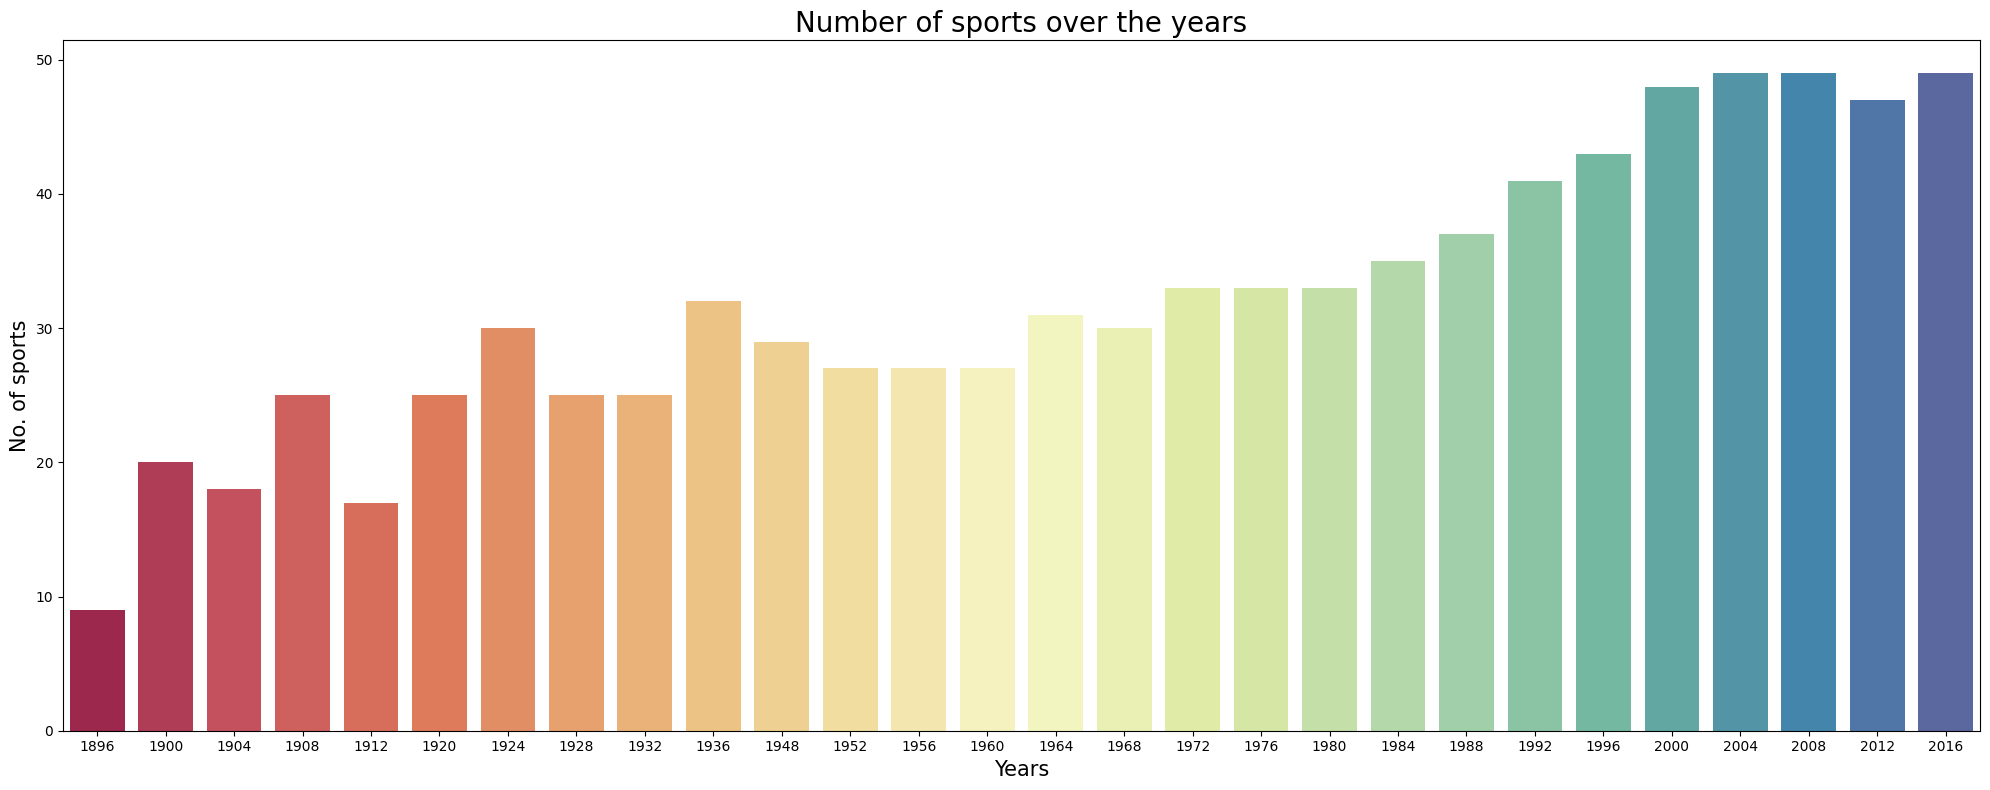

In [14]:
#Crear grafico de barras


sport_per_year_plot = sns.barplot(data=sports_per_year, x=sports_per_year["Year"], y=sports_per_year["Sport"], palette="Spectral")

#Modificar parametros del grafico para hacerlo mas presentable
sport_per_year_plot.figure.set_figwidth(20)
sport_per_year_plot.figure.set_figheight(8)
sport_per_year_plot.set_title("Number of sports over the years", fontsize=20)
sport_per_year_plot.set_xlabel("Years", fontsize=15)
sport_per_year_plot.set_ylabel("No. of sports", fontsize=15)
plt.tight_layout()

#Mostrar grafico
plt.show()


#### - Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo 

In [15]:
#Filtrar el nombre, año y sexo de cada participante. Se eliminan los atletas que participaron en varios eventos el mismo año.
athlete_per_year_and_sex = olympic_history[["Sex","Year","Name"]].drop_duplicates()

display(athlete_per_year_and_sex)

,Sex,Year,Name
0,M,1992,A Dijiang
1,M,2012,A Lamusi
2,M,1920,Gunnar Nielsen Aaby
3,M,1900,Edgar Lindenau Aabye
4,F,1988,Christine Jacoba Aaftink
...,...,...,...
271110,F,2016,Olga Igorevna Zyuzkova
271111,M,1976,Andrzej ya
271112,M,2016,Piotr ya
271114,M,2000,Tomasz Ireneusz ya


In [16]:
#Agrupar por sexo y año. Usando "count()" para obtener el numero de participantes.

athlete_per_year_and_sex_grouped = athlete_per_year_and_sex.groupby(["Sex","Year"], as_index=False).count()
athlete_per_year_and_sex_grouped.rename(columns={"Name":"Athletes"}, inplace=True)

athlete_per_year_and_sex_grouped.sample(5)

,Sex,Year,Athletes
47,M,1988,7349
39,M,1956,3650
34,M,1928,3362
44,M,1976,5704
46,M,1984,6213


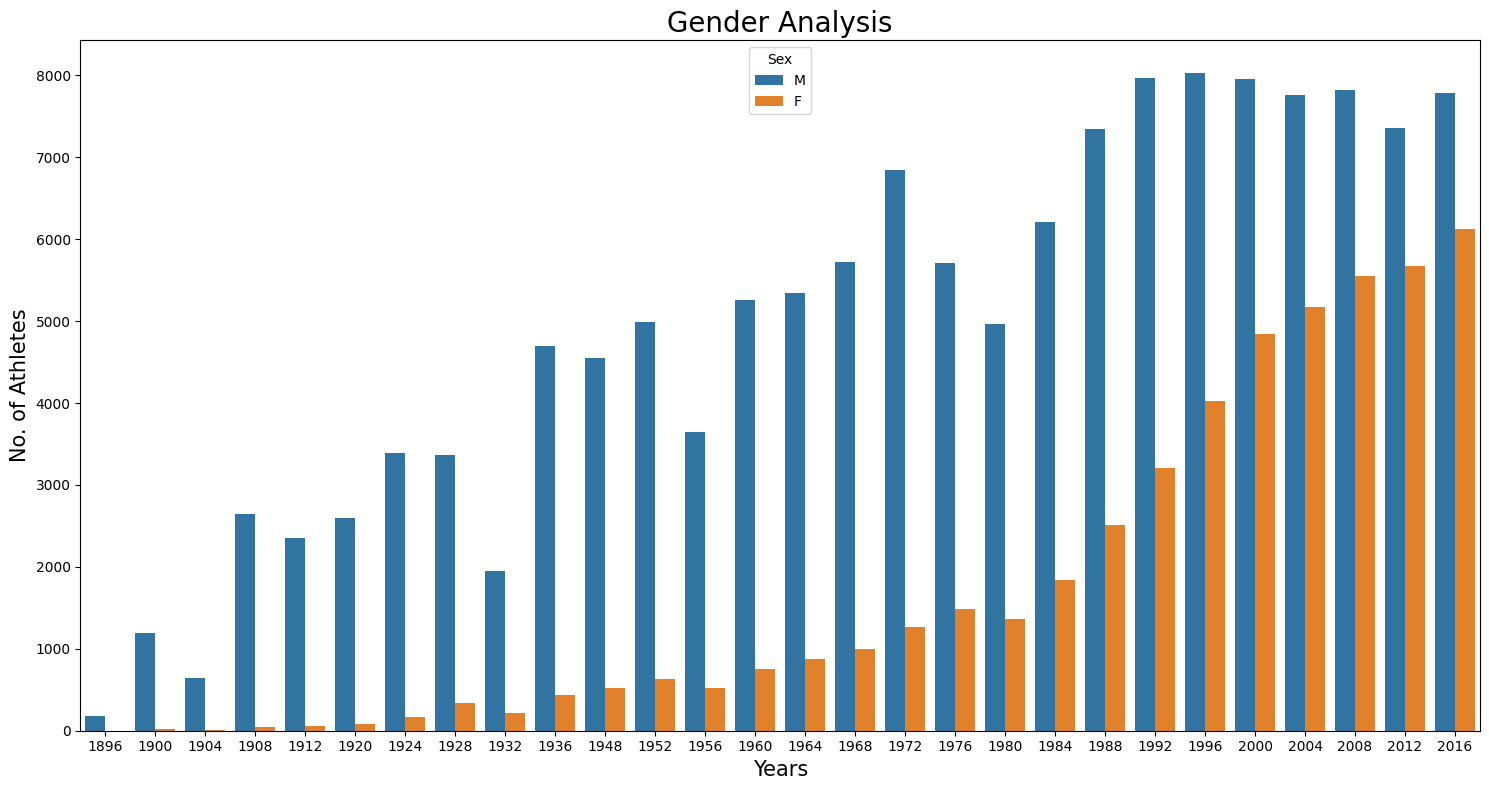

In [17]:
#Crear grafico de barras

athlete_per_year_and_sex_plot = sns.barplot(data=athlete_per_year_and_sex_grouped, 
                                            x="Year", 
                                            y="Athletes",
                                            hue="Sex", 
                                            hue_order = ['M', 'F']
                                           )

#Modificar parametros del grafico para hacerlo mas presentable
athlete_per_year_and_sex_plot.figure.set_figwidth(15)
athlete_per_year_and_sex_plot.figure.set_figheight(8)
athlete_per_year_and_sex_plot.set_title("Gender Analysis", fontsize=20)
athlete_per_year_and_sex_plot.set_xlabel("Years", fontsize=15)
athlete_per_year_and_sex_plot.set_ylabel("No. of Athletes", fontsize=15)
plt.tight_layout()

#Mostrar grafico
plt.show()

#### - Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais

In [18]:
olympic_history.sample(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
157981,79309,Francesco Miano-Petta,M,25.0,182.0,120.0,Italy,ITA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",NaN
129807,65353,Yevgeny Kuzin,M,20.0,182.0,73.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN
111215,56268,Eduardo Julve Ciriaco,M,24.0,NaN,NaN,Peru,PER,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Decathlon,NaN
29997,15486,"Charles ""Charlie"" Brown",M,25.0,168.0,57.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Boxing,Boxing Men's Featherweight,Bronze
33986,17507,Elisa Calsi,F,19.0,NaN,NaN,Italy,ITA,1956 Summer,1956,Summer,Melbourne,Gymnastics,Gymnastics Women's Floor Exercise,NaN
21846,11537,"Alexandre ""Alex"" Bilodeau",M,18.0,173.0,76.0,Canada,CAN,2006 Winter,2008,Winter,Torino,Freestyle Skiing,Freestyle Skiing Men's Moguls,NaN
218397,109687,Shi Yao,F,23.0,178.0,70.0,China,CHN,2010 Winter,2012,Winter,Vancouver,Ice Hockey,Ice Hockey Women's Ice Hockey,NaN
89009,45128,"Robert Sherman ""Bob"" Halperin",M,52.0,183.0,93.0,Shrew II,USA,1960 Summer,1960,Summer,Roma,Sailing,Sailing Mixed Two Person Keelboat,Bronze
36741,18883,Catalina Castao Alvarez,F,25.0,NaN,NaN,Colombia,COL,2004 Summer,2004,Summer,Athina,Tennis,Tennis Women's Singles,NaN
148667,74566,Melrose Mansaray,F,20.0,165.0,56.0,Sierra Leone,SLE,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 400 metres,NaN


In [19]:
#Guardar codigos NOC en Dataframe
noc_route = os.path.join("res","120_years_olympic_history","noc_regions.csv")

noc = pd.read_csv(noc_route, engine="python", header=0)

noc.sample(5)


,NOC,region,notes
131,MGL,Mongolia,NaN
188,STP,Sao Tome and Principe,NaN
91,INA,Indonesia,NaN
62,ESA,El Salvador,NaN
9,ARM,Armenia,NaN


In [20]:
#Se unen los dos DataFrame, se eliminan la columna NOC y notes para que quede el dataframe solo con el nombre del pais y las medallas.
medal_countries = olympic_history[["NOC", "Medal"]].merge(noc, on=["NOC"], how="left").drop(["NOC", "notes"], axis=1)
medal_countries.rename(columns={"region":"Country"}, inplace=True)
medal_countries.sample(5)

,Medal,Country
135377,NaN,South Korea
113140,NaN,Zimbabwe
61520,NaN,UK
111156,Gold,Switzerland
34466,NaN,Italy


In [21]:
#Agrupar por nombre de Pais y sortear de mayor a menor el conteo de las medallas.

medal_countries_grouped = medal_countries.groupby("Country").count().reset_index().sort_values(by=["Medal"],ascending=False)

medal_countries_grouped.head(5)

,Country,Medal
191,USA,5637
151,Russia,3947
67,Germany,3756
190,UK,2068
63,France,1777


In [24]:
#Se usa slicing para obtener los 50 paises con mas medallas
top_50 = medal_countries_grouped[:51]

display(top_50)

,Country,Medal
191,USA,5637
151,Russia,3947
67,Germany,3756
190,UK,2068
63,France,1777
87,Italy,1637
176,Sweden,1536
33,Canada,1352
10,Australia,1349
78,Hungary,1135


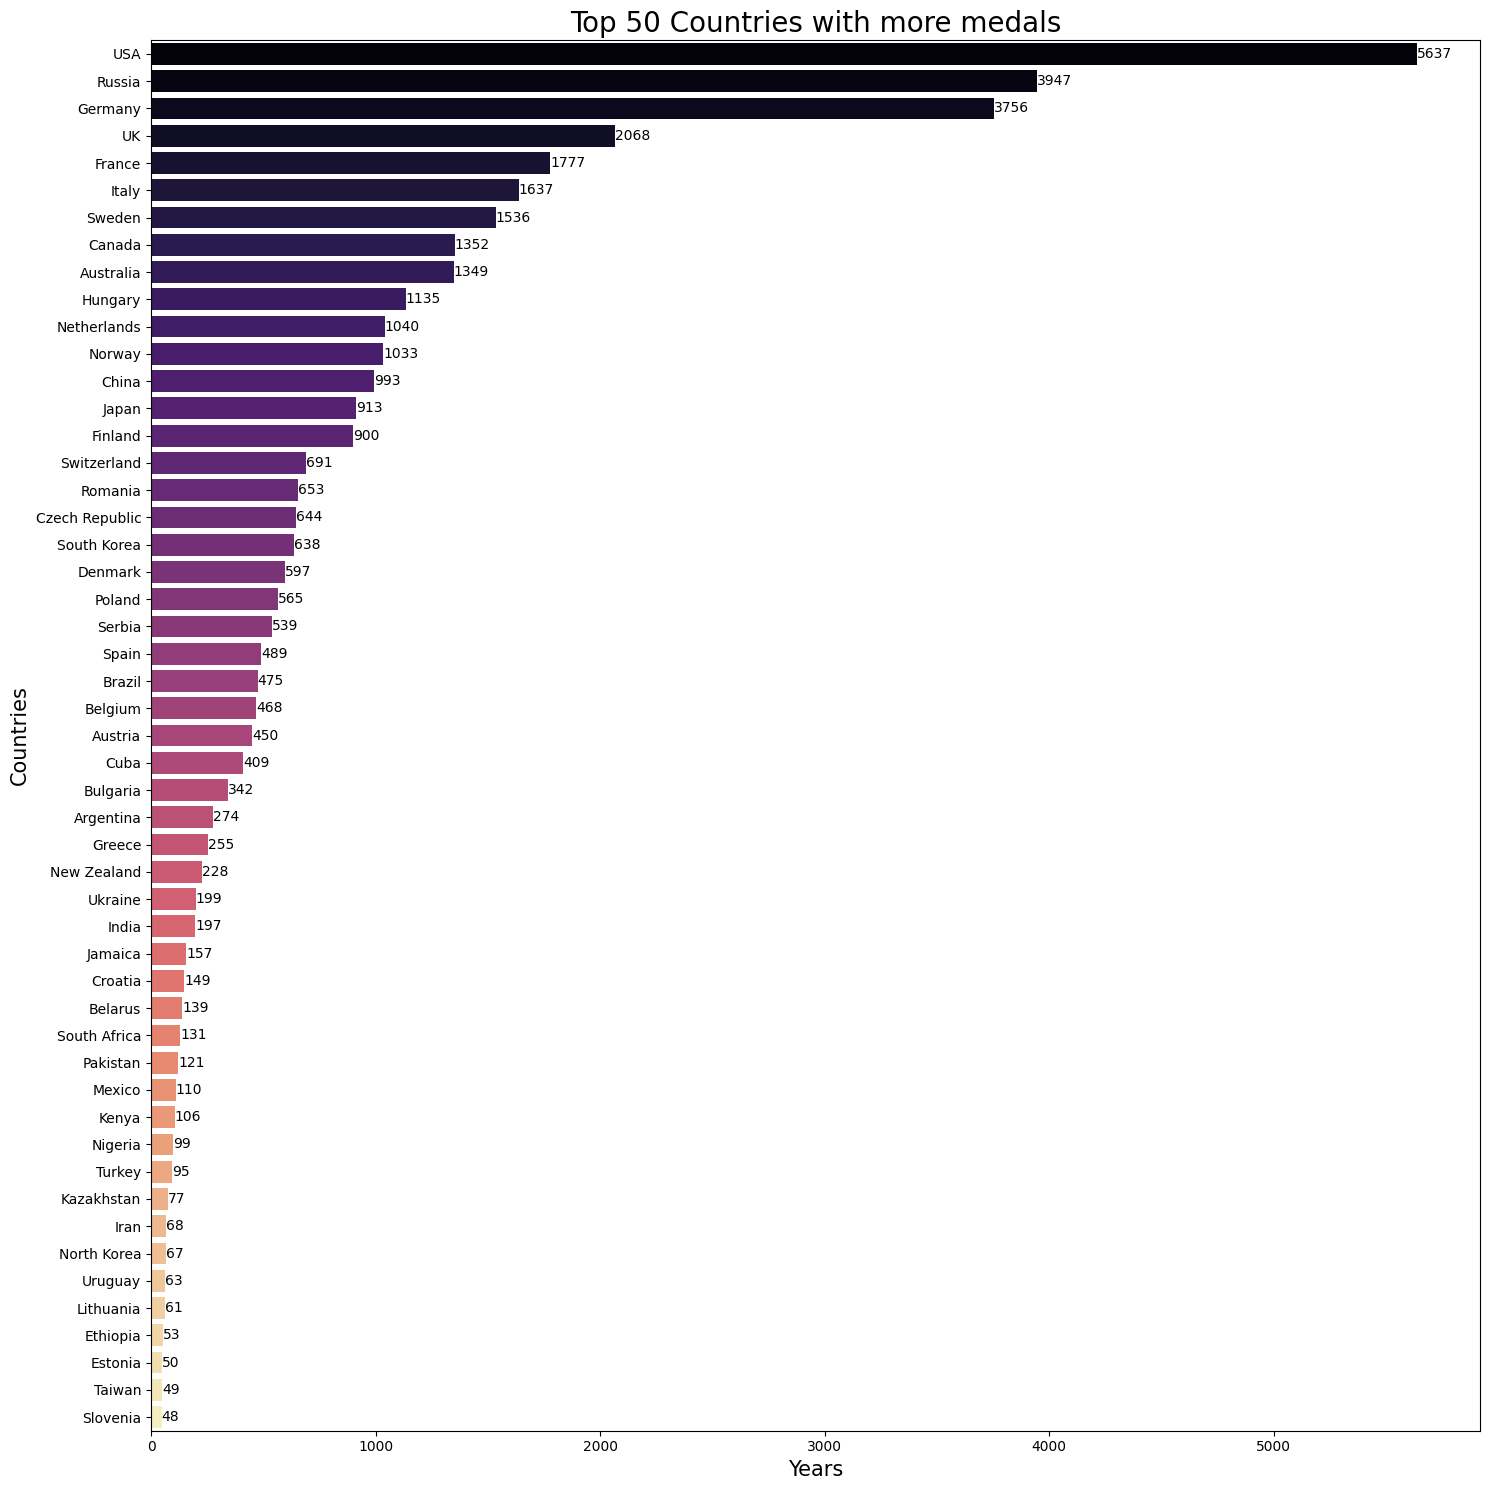

In [29]:
#Crear grafico de barras

top_50_plot = sns.barplot(data=top_50, 
                          x="Medal", 
                          y="Country",
                          orient="h",
                          palette="magma"
                          )

#Modificar parametros del grafico para hacerlo mas presentable
top_50_plot.figure.set_figwidth(15)
top_50_plot.figure.set_figheight(15)
top_50_plot.set_title("Top 50 Countries with more medals", fontsize=20)
top_50_plot.set_xlabel("Years", fontsize=15)
top_50_plot.set_ylabel("Countries", fontsize=15)
top_50_plot.bar_label(top_50_plot.containers[0])
plt.tight_layout()

#Mostrar grafico
plt.show()

### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)

#### - Preparar los datos para el modelo.

Para obtener la edad, sexo, peso, altura y el tiempo de los atletas se deben unir los dos dataframe olympic_history que contiene los datos del atleta y olympic_track_field que contiene el tiempo que hizo cada uno.

In [86]:
#Se filtran de los dos dataset olympic_track_field y olympic_history los participantes de 100 metros lisos
#Para obtener los filtros con los que filtrar cada dataset, busque a mano como estaban escrito en cada uno

athletes_100_meters= olympic_history[(olympic_history["Event"].str.contains("Athletics Men's 100 metres")) | 
                                             (olympic_history["Event"].str.contains("Athletics Women's 100 metres"))].reset_index(drop=True)
 
results_100_meters = olympic_track_field[(olympic_track_field["Event"].str.contains("100M Men")) | 
                                             (olympic_track_field["Event"].str.contains("100M Women"))].reset_index(drop=True)

In [87]:
athletes_100_meters.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
1,96,Carlos Rodolfo Abaunza Balladares,M,18.0,168.0,60.0,Nicaragua,NCA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN
2,104,Gana Abba Kimet,M,26.0,NaN,NaN,Chad,CHA,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN
3,129,Ruslan Abbasov,M,22.0,181.0,74.0,Azerbaijan,AZE,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN
4,168,Younis Abdallah Rabee,M,23.0,169.0,68.0,Kuwait,KUW,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN


In [88]:
results_100_meters.head(5)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,100M Men,Rio,2016,G,Usain BOLT,JAM,9.81
1,M,100M Men,Rio,2016,S,Justin GATLIN,USA,9.89
2,M,100M Men,Rio,2016,B,Andre DE GRASSE,CAN,9.91
3,M,100M Men,Beijing,2008,G,Usain BOLT,JAM,9.69
4,M,100M Men,Beijing,2008,S,Richard THOMPSON,TTO,9.89


Los dataframe tienen escrito los nombres de manera distinta, en uno el apellido esta todo en mayuscula y el otro capitalizado solo la primera letra. 
Para que tengan el mismo formato se usa el metodo str.title para modificar los Name y que queden capitalizados la primera letra del apellido.

In [97]:
athletes_100_meters["Name"]

0       Cornelia "Cor" Aalten (-Strannood)
1        Carlos Rodolfo Abaunza Balladares
2                          Gana Abba Kimet
3                           Ruslan Abbasov
4                    Younis Abdallah Rabee
                       ...                
3411                        Vittorio Zucca
3412             Zaidatul Husniah Zulkifli
3413               Johan Gerard "Jo" Zwaan
3414                    Krzysztof Zwoliski
3415         Viktoriya Viktorovna Zyabkina
Name: Name, Length: 3416, dtype: object

In [101]:
results_100_meters["Name"]

0                  Usain Bolt
1               Justin Gatlin
2             Andre De Grasse
3                  Usain Bolt
4            Richard Thompson
                ...          
137              Dorothy Hall
138        Shirley Strickland
139    Stanislawa Walasiewicz
140              Hilda Strike
141     Wilhelmina Von Bremen
Name: Name, Length: 142, dtype: object

In [94]:
#Cambiar formato de los nombres
results_100_meters["Name"] = results_100_meters["Name"].str.title()

#Nombres despues del cambio
results_100_meters["Name"]

0                  Usain Bolt
1               Justin Gatlin
2             Andre De Grasse
3                  Usain Bolt
4            Richard Thompson
                ...          
137              Dorothy Hall
138        Shirley Strickland
139    Stanislawa Walasiewicz
140              Hilda Strike
141     Wilhelmina Von Bremen
Name: Name, Length: 142, dtype: object

El dataframe results_100_meters solo tiene los tiempos de los atletas que tuvieron medalla, asi que de athletes_100_meters se filtran los participantes que no tienen medalla(El valor en la columna es NaN)

In [105]:
athletes_100_meters = athletes_100_meters[athletes_100_meters["Medal"].notna()]

athletes_100_meters

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
14,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold
125,2695,Nia Sifaatihii Ali,F,27.0,170.0,65.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Silver
145,3055,Glory Alozie Oluchi,F,22.0,155.0,51.0,Nigeria,NGR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 100 metres Hurdles,Silver
168,4390,Tatyana Mikhaylovna Anisimova (Poluboyarova-),F,26.0,172.0,65.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Women's 100 metres Hurdles,Silver
204,5547,Evelyn Ashford (-Washington),F,27.0,165.0,52.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,129523,Allan Wipper Wells,M,28.0,183.0,86.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 100 metres,Gold
3281,129536,Kellie Wells,F,30.0,163.0,57.0,United States,USA,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 100 metres Hurdles,Bronze
3312,130626,Lauryn Chenet Williams,F,20.0,160.0,67.0,United States,USA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 100 metres,Silver
3316,130651,Percy Alfred Williams,M,19.0,170.0,56.0,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 100 metres,Gold
